In [1]:
import os
import numpy as np
import yaml
import matplotlib.pyplot as plt
import cuvis
from cuvis_ai.supervised import MLP
from cuvis_ai.preprocessor import PCA
from cuvis_ai.utils.data import CuvisData
from cuvis_ai.utils.data.NumpyData import OutputFormat


In [2]:
dataloader = CuvisData("C:\\Measurements\\GrowRipe",output_format=OutputFormat.SegmentationMask)

Reading from directory: C:\Measurements\GrowRipe
Found file: C:\Measurements\GrowRipe\20230809_113809_X20_1_a_000.cu3s
Session file has 46 cubes
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Canvas_size: (410, 410) bbox COCO: [220.0, 245.0, 29.0, 33.0]
Canvas_size: (410, 410) bbox COCO: [217.0, 253.0, 29.0, 33.0]
Canvas_size: (410, 410) bbox COCO: [213.0, 261.0, 29.0, 32.0]
Canvas_size: (410, 410) bbox COCO: [207.0, 267.0, 30.0, 33.0]
Canvas_size: (410, 410) bbox COCO: [202.0, 274.0, 29.0, 32.0]
Canvas_size: (410, 410) bbox COCO: [194.0, 279.0, 30.0, 31.0]
Canvas_size: (410, 410) bbox COCO: [187.0, 283.0, 30.0, 32.0]
Canvas_size: (410, 410) bbox COCO: [179.0, 287.0, 31.0, 31.0]
Canvas_size: (410, 410) bbox COCO: [171.0, 289.0, 31.0, 31.0]
Canvas_size: (410, 410) bbox COCO: [162.0, 291.0, 32.0, 30.0]
Canvas_size: (410, 410) bbox COCO: [154.0, 291.0, 32.0, 31.0]
Canvas_size: (410, 410) bbox COCO: [146.0, 290.0, 32.0, 31.0]
Canvas_size: (410, 410) bbox

In [3]:
img, labels = dataloader[0]
print(labels)

idx = 0
(410, 410, 164)
After move axis: (164, 410, 410)
Mask([[0, 0, 0,  ..., 0, 0, 0],
      [0, 0, 0,  ..., 0, 0, 0],
      [0, 0, 0,  ..., 0, 0, 0],
      ...,
      [0, 0, 0,  ..., 0, 0, 0],
      [0, 0, 0,  ..., 0, 0, 0],
      [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)


In [4]:
from cuvis_ai.pipeline import Pipeline
from cuvis_ai.utils.nn_config import Optimizer, Adam
from cuvis_ai.supervised import SkorchSupervised
from torch import nn
pipeline = Pipeline('Very complex pipeline')

class SimpleMLP(nn.Module):
    def __init__(self, num_units=10, nonlin=nn.ReLU()):
        super().__init__()

        self.dense0 = nn.Linear(20, num_units)
        self.nonlin = nonlin
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units, num_units)
        self.output = nn.Linear(num_units, 2)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense1(X))
        X = self.softmax(self.output(X))
        return X


wrapper = SkorchSupervised(model=SimpleMLP, optimizer=Adam(), verbose=True, model_args={'num_units' : 128})

# mlp = MLP(10, Adam(), verbose=True)

pipeline.add_stage(wrapper)

Single stage pipeline!


In [5]:
pipeline.train(dataloader,dataloader)

idx = 0
(410, 410, 164)
After move axis: (164, 410, 410)
idx = 1
(410, 410, 164)
After move axis: (164, 410, 410)
idx = 2
(410, 410, 164)
After move axis: (164, 410, 410)
idx = 3
(410, 410, 164)
After move axis: (164, 410, 410)
idx = 4
(410, 410, 164)
After move axis: (164, 410, 410)
idx = 5
(410, 410, 164)
After move axis: (164, 410, 410)
idx = 6
(410, 410, 164)
After move axis: (164, 410, 410)
idx = 7
(410, 410, 164)
After move axis: (164, 410, 410)
idx = 8
(410, 410, 164)
After move axis: (164, 410, 410)
idx = 9
(410, 410, 164)
After move axis: (164, 410, 410)
shape image: (1681000, 164)
shape labels: (1681000,)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x164 and 20x125)

In [ ]:
arr = np.zeros((3,4,5,6))


In [ ]:
tmp = arr.reshape(-1, *arr.shape[-2:])
print(tmp.shape)

(12, 5, 6)


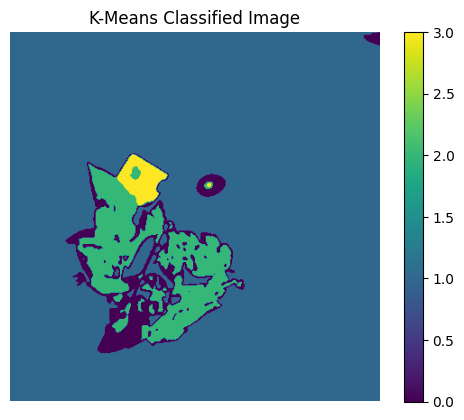